In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import datetime

## Figure和Axes上的文本

### 1.文本API示例
| pyplot API | OO API  | description  |
| ---------- | ------- | ------------ |
| `text` | `text` | 在子图axes的任意位置添加文本|
| `annotate` | `annotate` | 在子图axes的任意位置添加注解，包含指向性的箭头|
| `xlabel` | `set_xlabel` | 为子图axes添加x轴标签 |
| `ylabel` | `set_ylabel` | 为子图axes添加y轴标签 |
| `title` | `set_title` | 为子图axes添加标题 |
| `figtext` | `text` | 在画布figure的任意位置添加文本  |
| `suptitle` | `suptitle` | 为画布figure添加标题 |

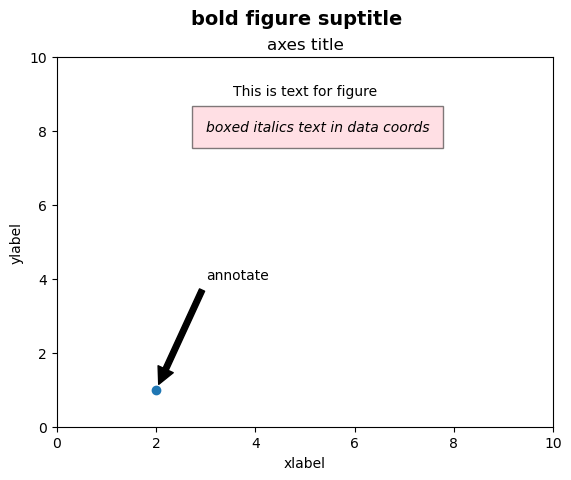

In [2]:
# 以OO模式(创建实例对象模式)展示如何添加文本
fig,ax = plt.subplots()

# 分别为figure和ax设置标题。注意两者的位置是不同的
fig.suptitle('bold figure suptitle',fontsize=14,fontweight='bold')
ax.set_title('axes title')

# 设置x和y轴标签
ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel')

# 设置x轴y轴显示范围为0-10
ax.axis([0,10,0,10])

# 在子图上添加文本
ax.text(3, 8, 'boxed italics text in data coords', style='italic',
        bbox={'facecolor': 'pink', 'alpha': 0.5, 'pad': 10})

# 在画布上添加文本，一般在子图上添加文本是更常见的操作，这种方法很少用
fig.text(0.4,0.8,'This is text for figure')

ax.plot([2], [1], 'o')
# 添加注解
ax.annotate('annotate', xy=(2, 1), xytext=(3, 4),
            arrowprops=dict(facecolor='black', shrink=0.05));


### 2.text-子图上的文本
- axes.text(x,y,s,fontdict,**kwargs)
    - x,y为文本的出现位置，默认当前坐标系下的坐标值
    - s为文本内容
    - fontdict可选参数用于覆盖默认文本属性
    - **kwargs关键字参数，也可用于传入文本样式参数
    - bbox :You can put a rectangular box around the text instance (e.g., to set a background color) by using the keyword bbox.
- 重点解释下fontdict和**kwargs参数，这两种方式都可以用于调整呈现的文本样式，最终效果是一样的，不仅text方法，其他文本方法如set_xlabel,set_title等同样适用这两种方式修改样式。

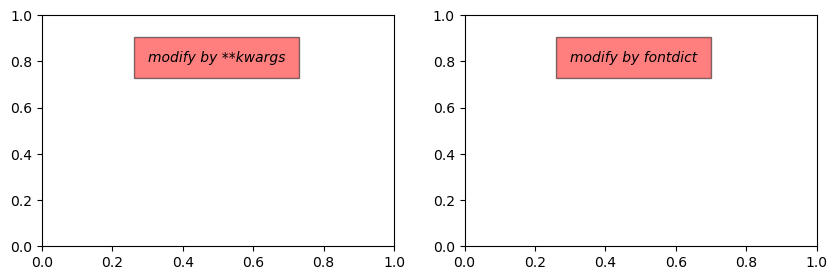

In [3]:
fig = plt.figure(figsize=(10,3))
axes = fig.subplots(1,2)

# 使用关键字参数修改文本样式
axes[0].text(0.3, 0.8, 'modify by **kwargs', style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10});

# 使用fontdict参数修改文本样式
font = {'bbox':{'facecolor': 'red', 'alpha': 0.5, 'pad': 10}, 'style':'italic'}
axes[1].text(0.3, 0.8, 'modify by fontdict', fontdict=font);


### 3.xlabel和ylabel-子图的xy轴标签
- Axes.set_xlabel(xlabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)
- ylabel与之类似不再写出
- labelpad为标签和坐标轴之间的距离。默认为4
- loc为标签位置，可选参数'left','center','right'

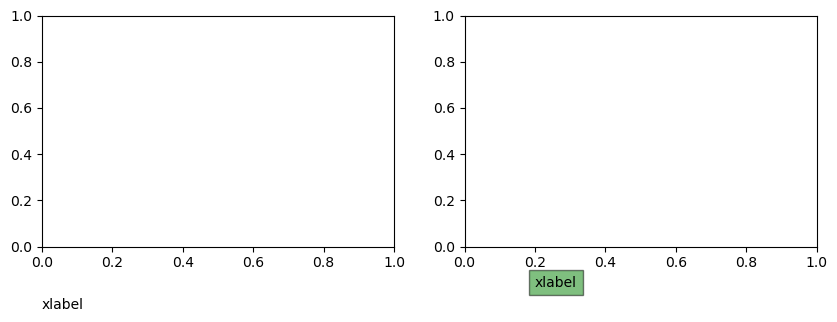

In [17]:
# 观察labelpad和loc参数的使用效果
fig = plt.figure(figsize=(10,3))
axes = fig.subplots(1,2)
axes[0].set_xlabel('xlabel',labelpad=20,loc='left')

# loc参数仅能提供粗略的位置调整，如果想要更精确的设置标签的位置，
# 可以使用position参数+horizontalalignment参数来定位
# position由一个元组组成，第一个元素0.2表示x轴标签在x轴的位置，
# 第二个元素对于xlabel其实是无意义的，随便填一个数都可以
# horizontalalignment='left'表示左对齐，
# 这样设置后x轴标签就能精确定位在x=0.2的位置处
axes[1].set_xlabel('xlabel',position=(0.2,''),horizontalalignment='left',
                   bbox={'facecolor':'green','alpha':0.5});

### 4.title和suptitle-子图和画布的标题
- Axes.set_title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)
    - label：标题,fontdict使用字典设置字体样式,loc标题位置,pad标题与子图的距离
    - y：标题位于子图垂直方向的位置，默认为1，即在子图的顶部
- Figure.suptitle(t, **kwargs)
    - t标题,**kwargs其他参数

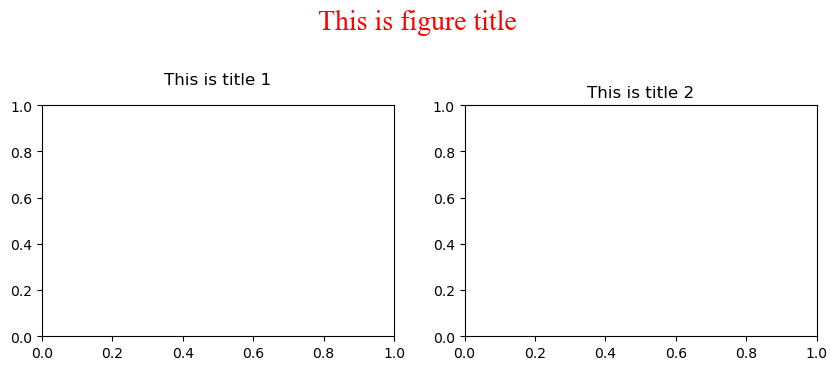

In [4]:
# 观察pad参数的使用效果
fig,axes = plt.subplots(figsize=(10,3),nrows=1,ncols=2)
fig.suptitle('This is figure title',c='red',family='Times New Roman',size=20,y=1.2)
axes[0].set_title('This is title 1',pad=15)
axes[1].set_title('This is title 2',pad=6);

### 5.annotate-子图的注解(在子图上添加箭头)
- Axes.annotate(text, xy, *args, **kwargs)
    - text注解箭头指向的坐标
    - xytext为注解文字的坐标，
    - xycoords用来定义xy参数的坐标系，
    - textcoords用来定义xytext参数的坐标系，
    - arrowprops用来定义指向箭头的样式

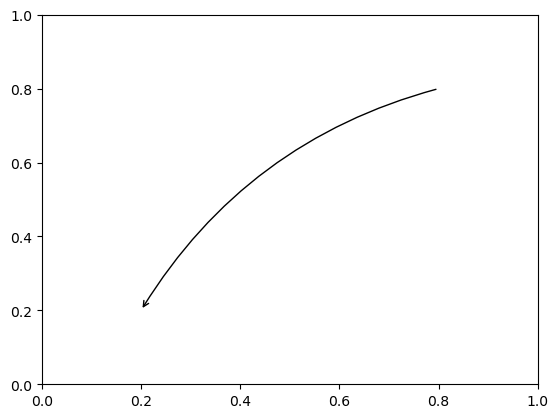

In [22]:
fig = plt.figure()
ax = fig.add_subplot()
ax.annotate("",
            xy=(0.2, 0.2), xycoords='data',
            xytext=(0.8, 0.8), textcoords='data',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.2")
            );

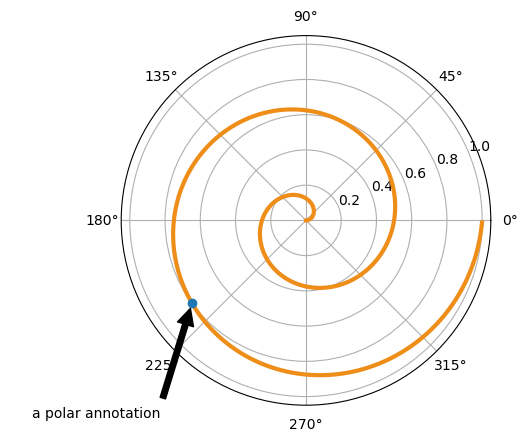

In [5]:
fig = plt.figure()
ax = fig.add_subplot(projection='polar') #绘制极坐标系
r = np.arange(0, 1, 0.001)
theta = 2 * 2*np.pi * r
line, = ax.plot(theta, r, color='#ee8d18', lw=3)

ind = 800
thisr, thistheta = r[ind], theta[ind]
ax.plot([thistheta], [thisr], 'o')
ax.annotate('a polar annotation',
            xy=(thistheta, thisr),  # theta, radius
            xytext=(0.05, 0.05),    # fraction, fraction
            textcoords='figure fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left',
            verticalalignment='bottom');

### 6.字体属性的设置
- 全局字体属性的设置
- 自定义局部字体

In [32]:
# 全局字体设置
#该block讲述如何在matplotlib里面，修改字体默认属性，完成全局字体的更改。
plt.rcParams['font.sans-serif'] = ['SimHei']   
# 指定默认字体为新宋体。
plt.rcParams['axes.unicode_minus'] = False      
# 解决保存图像时 负号'-' 显示为方块和报错的问题。

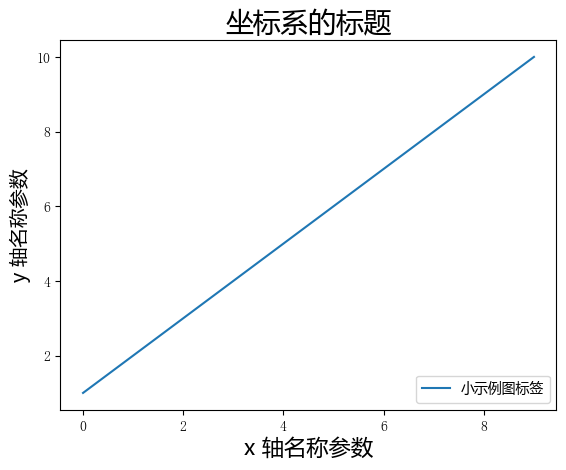

In [7]:
#局部字体的修改方法1
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plt.plot(x, label='小示例图标签')

# 直接用字体的名字
# 设置x轴名称，采用微软雅黑字体
plt.xlabel('x 轴名称参数', fontproperties='Microsoft YaHei', fontsize=16)
# 设置Y轴名称
plt.ylabel('y 轴名称参数', fontproperties='Microsoft YaHei', fontsize=14)
# 设置坐标系标题的字体
plt.title('坐标系的标题',  fontproperties='Microsoft YaHei', fontsize=20)
# 小示例图的字体设置
plt.legend(loc='lower right', prop={"family": 'Microsoft YaHei'}, fontsize=10) ;   

## Tick上的文本
- 简单模式
    - set_ticks 刻度位置设置
    - set_ticklabels 刻度标签设置
- Tick Locators and Formatters

### 简单模式

In [3]:
x1 = np.linspace(0,5,100)
y1 = np.cos(2*np.pi*x1)*np.exp(-x1)

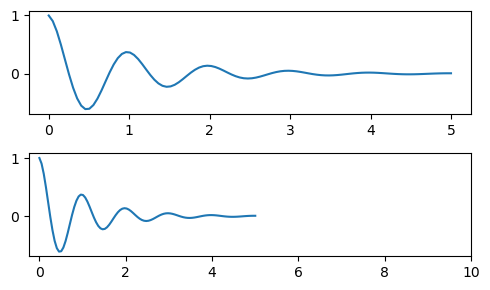

In [9]:
# 使用set_ticks()设置刻度线
fig,axs = plt.subplots(2,1,figsize=(5,3),tight_layout=True)
axs[0].plot(x1,y1)
axs[1].plot(x1,y1)
axs[1].xaxis.set_ticks(np.arange(0,10.1,2));

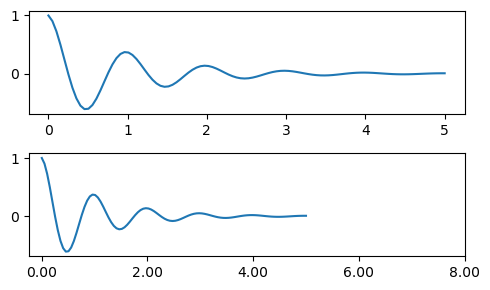

In [10]:
# 使用axis的set_ticklabels方法手动设置标签格式的例子
fig,axs = plt.subplots(2,1,figsize=(5,3),tight_layout=True)
axs[0].plot(x1,y1)
axs[1].plot(x1,y1)
ticks = np.arange(0.,8.1,2.)
tickla = [f'{tick:1.2f}' for tick in ticks]
axs[1].xaxis.set_ticks(ticks)
axs[1].xaxis.set_ticklabels(tickla);

<a list of 14 Line2D ticklines objects>


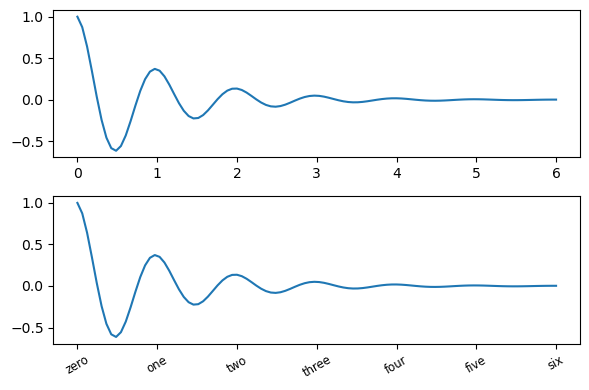

In [16]:
#一般绘图时会自动创建刻度，而如果通过上面的例子使用set_ticks创建刻度
# 可能会导致tick的范围与所绘制图形的范围不一致的问题。
#所以在下面的案例中，axs[1]中set_xtick的设置要与数据范围所对应
# 然后再通过set_xticklabels设置刻度所对应的标签
fig,axs = plt.subplots(2,1,figsize=(6,4),tight_layout=True)
x1 = np.linspace(0,6,100)
y1 = np.cos(2*np.pi*x1)*np.exp(-x1)
axs[0].plot(x1,y1)
axs[0].set_xticks([0,1,2,3,4,5,6])

axs[1].plot(x1,y1)
axs[1].set_xticks([0,1,2,3,4,5,6])
axs[1].set_xticklabels(['zero','one', 'two', 'three', 'four', 'five','six'],
                       rotation=30,fontsize='small')
axs[1].xaxis.set_ticks_position('bottom')
print(axs[1].xaxis.get_ticklines(minor=False))

### Tick Locators and Formatters
- Axis.set_major_locator 设置主刻度位置
- Axis.set_minor_locator 设置副刻度位置
- Axis.set_major_formatter 设置主刻度标签
- Axis.set_minor_formatter 设置副刻度标签
- 两个locator和两个formatter命令可以接收str或者func

#### Tick Formatter

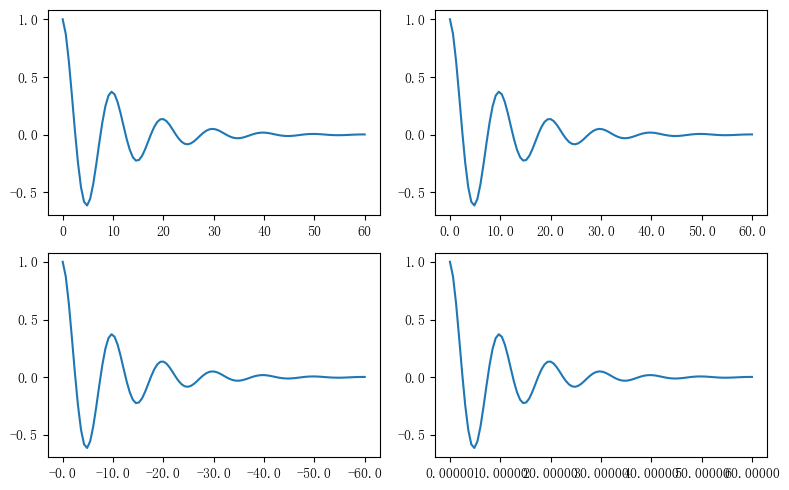

In [13]:
# 接收字符串格式的例子
import matplotlib

x1 = np.linspace(0,6,100)
y1 = np.cos(2*np.pi*x1)*np.exp(-x1)
fig,axs = plt.subplots(2,2,figsize=(8,5),tight_layout=True)
for ax in axs.flat: #生成一维迭代器，适用于逐元素操作。
    ax.plot(x1*10,y1)

formatter = matplotlib.ticker.FormatStrFormatter('%1.1f')
axs[0,1].xaxis.set_major_formatter(formatter)

formatter = matplotlib.ticker.FormatStrFormatter('-%1.1f')
axs[1, 0].xaxis.set_major_formatter(formatter)

formatter = matplotlib.ticker.FormatStrFormatter('%1.5f')
axs[1, 1].xaxis.set_major_formatter(formatter);

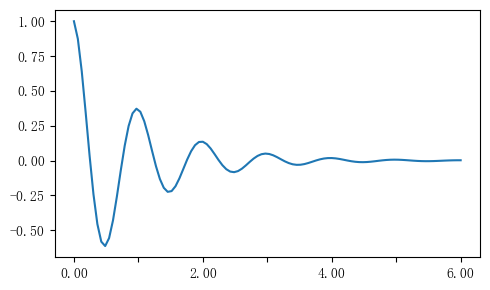

In [17]:
# 接收函数的例子
# def formatoddticks(x,pos):
#     if x % 2:
#         return f'{x:1.2f}'
#     else:
#         return ''

x1 = np.linspace(0,6,100)
y1 = np.cos(2*np.pi*x1)*np.exp(-x1)
fig, ax = plt.subplots(figsize=(5, 3), tight_layout=True)
ax.plot(x1, y1)
ax.xaxis.set_major_formatter(lambda x,pos:'' if x % 2 else f'{x:.2f}');

#### Tick Locators

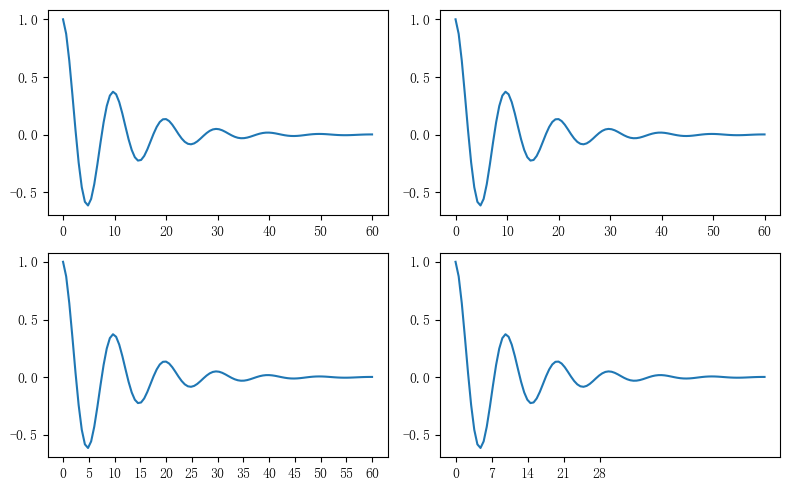

In [ ]:
# 接收各种locator的例子
x1 = np.linspace(0,6,100)
y1 = np.cos(2*np.pi*x1)*np.exp(-x1)
fig, axs = plt.subplots(2, 2, figsize=(8, 5), tight_layout=True)
for n, ax in enumerate(axs.flat):
    ax.plot(x1*10., y1)

locator = matplotlib.ticker.AutoLocator() #自动分配刻度值的位置
axs[0, 0].xaxis.set_major_locator(locator)

#自动选择合适的位置，并且刻度之间最多不超过7个间隔nbins
locator = matplotlib.ticker.MaxNLocator(nbins=7) 
axs[0, 1].xaxis.set_major_locator(locator)

#将刻度的标签设置为5的倍数
locator = matplotlib.ticker.MultipleLocator(5)
axs[1, 0].xaxis.set_major_locator(locator)

#直接指定刻度所在的位置
locator = matplotlib.ticker.FixedLocator([0,7,14,21,28])
axs[1, 1].xaxis.set_major_locator(locator);

| 定位器| 解释说明|
|--------------------|----------------|
| AutoLocator        | 自动定位器，多数绘图的默认刻度线定位。 |
| MaxNLocator        | 在最合适的位置找到带有刻度的最大间隔数。|
| LinearLocator      | 从最小到最大之间的均匀刻度定位。    |
| LogLocator         | 从最小到最大呈对数形式的刻度定位。   |
| MultipleLocator    | 刻度和范围是基数的倍数；整数或浮点数（自定义刻度用较多的方法）。   |
| FixedLocator       | 固定刻度定位。刻度位置是固定的。|
| IndexLocator       | 索引定位器。(base:间隔,offset:起始位置) |
| NullLocator        | 空定位器。无刻度位置。|
| SymmetricalLogLocator | 与符号规范一起使用的定位器。对于超出阈值的部分，其工作原理类似于LogLocator；如果在限制范围内，则将其加0。|
| LogitLocator       | 用于logit缩放的刻度定位器。|
| OldAutoLocator     | 选择一个MultipleLocator并动态重新分配它，以在导航期间进行智能打勾（直接翻译，实际使用较少）。 |
| AutoMinorLocator   | 轴为线性且主刻度线等距分布时，副刻度线定位器。将主要刻度间隔细分为指定数量的次要间隔，根据主要间隔默认为4或5。|

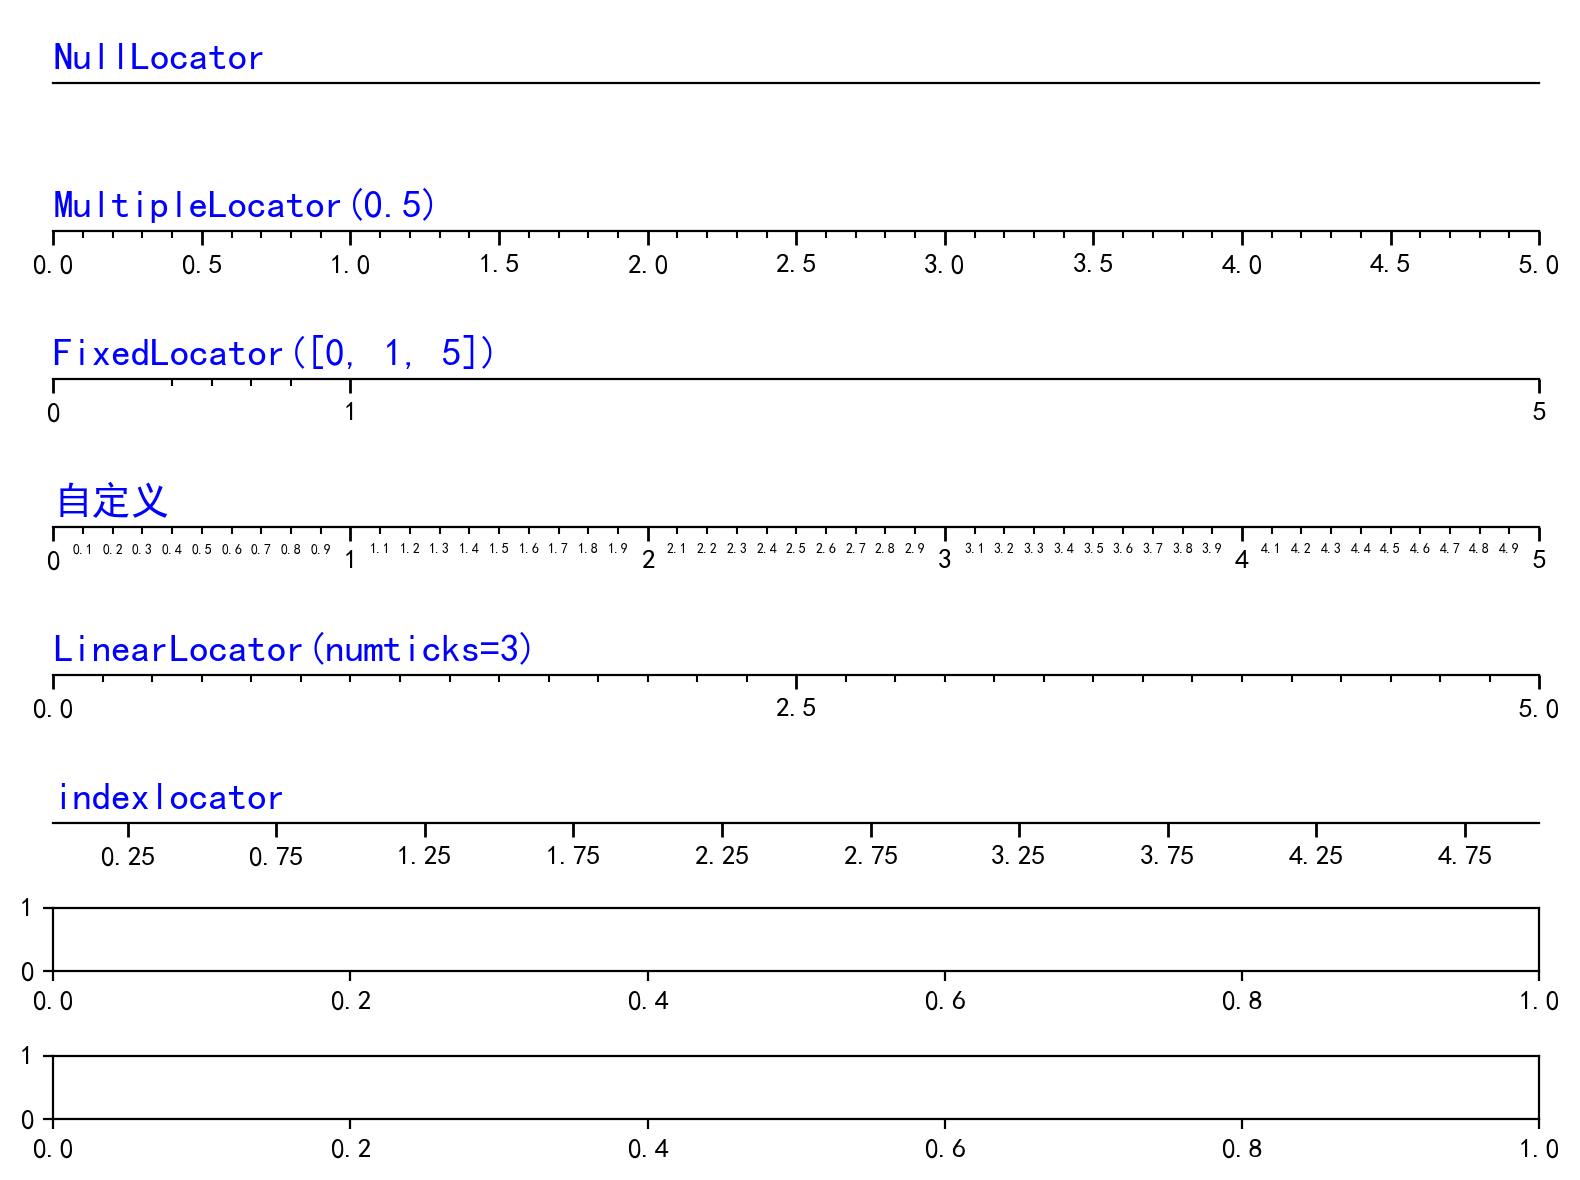

In [49]:
def setup(ax,title):
    """Set up common parameters for the Axes in the example."""
    ax.yaxis.set_major_locator(ticker.NullLocator()) #不显示y轴刻度
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['top'].set_color('none') # 隐藏边框线

    ax.xaxis.set_ticks_position('bottom')
    ax.tick_params(which='major', width=1.00, length=5)
    ax.tick_params(which='minor', width=0.75, length=2.5,labelsize=5)
    ax.set_xlim(0, 5)
    ax.set_ylim(0, 1)
    ax.text(0.0, 0.2, title, transform=ax.transAxes, #坐标系选择相对于如表比例或者坐标轴数据
            fontsize=14, family='SimHei', color='blue')

fig,axs = plt.subplots(8,1,figsize=(8,6),dpi=200,tight_layout=True)
setup(axs[0],title='NullLocator')
axs[0].xaxis.set_major_locator(ticker.NullLocator())
axs[0].xaxis.set_minor_locator(ticker.NullLocator())

setup(axs[1],title='MultipleLocator(0.5)')
axs[1].xaxis.set_major_locator(ticker.MultipleLocator(0.5))
axs[1].xaxis.set_minor_locator(ticker.MultipleLocator(0.1))

setup(axs[2],title='FixedLocator([0, 1, 5])')
axs[2].xaxis.set_major_locator(ticker.FixedLocator([0,1,5]))
axs[2].xaxis.set_minor_locator(ticker.FixedLocator(np.linspace(0.4,0.8,4)))

setup(axs[3],title='自定义')
axs[3].xaxis.set_major_locator(ticker.FixedLocator(np.arange(0,6)))
axs[3].xaxis.set_minor_locator(ticker.FixedLocator(np.arange(0,6,0.1)))
axs[3].xaxis.set_minor_formatter(ticker.FuncFormatter(lambda x,pos: f'{x:.1f}' if not np.isclose(x,int(x)) else ''))

setup(axs[4],title='LinearLocator(numticks=3)')
axs[4].xaxis.set_major_locator(ticker.LinearLocator(3))
axs[4].xaxis.set_minor_locator(ticker.LinearLocator(31))

setup(axs[5],title='indexlocator')
axs[5].plot([0]*5,color='white')
axs[5].xaxis.set_major_locator(ticker.IndexLocator(base=0.5,offset=0.25))